# Теорема Байеса

### Тест. Гениальность человека. Подготовлено на основе публикации на Хабр "Теорема Байеса: просто о сложном"

In [1]:
# 97% чувствительность (доля истинно положительных результатов)
# 95% специфичность (доля истинно отрицательных результатов)
# То есть тест даст 97% истинно положительных результатов для гениев 
# и 95% истинно отрицательных результатов для негениев.

###Предположим, мы также знаем, что 0,5% населения в целом гении. Какова вероятность того, что случайно выбранный человек с положительным результатом анализа является гением?

In [2]:
# Если мы выберем случайного человека из общей популяции без какого-либо тестирования, мы можем только сказать, 
# что вероятность того, что этот человек - гений, составляет 0,5%

![bayes_theorem.png](https://github.com/grishenkovp/statistics/blob/main/screenshot/bayes_theorem.png)

In [4]:
# P(Гений) = Уровень распространенности наркомании,
# P(Негений) = 1 - Уровень распространенности наркомании
# P(Положительный тест | Гений) = Чувствительность теста
# P(Отрицательный тест | Негений) = Специфичность теста
# P(Положительный тест | Негений) = 1 - Специфичность теста

In [5]:
def genius_man(prob_th:float, 
               sensitivity:float,
               specificity:float,
               prevelance:float,
               verbose=True)->float:
    p_genius = prevelance
    p_no_genius = 1-prevelance
    p_pos_genius = sensitivity
    p_neg_genius = specificity
    p_pos_no_genius = 1-specificity
    
    numerator  = p_pos_genius*p_genius
    denominator  = p_pos_genius*p_genius+p_pos_no_genius*p_no_genius
    probability  = numerator/denominator
    
    if verbose:
          if probability  > prob_th:
              print("Genius")
          else:
              print("Nogenius")

    return round(probability,3)

In [6]:
genius_man(0.5,0.97,0.95,0.005)

Nogenius


0.089

### Даже при использовании теста, который в 97% случаях верно выявляет положительные случаи и который в 95% случаях правильно выявляет отрицательные случаи, истинная вероятность быть гением с положительным результатом этого теста составляет всего 8,9%!

In [7]:
#Если вы посмотрите на расчеты, то станет понятным, что это связано с чрезвычайно низким уровнем распространенности. 
# Количество ложных срабатываний превышает количество истинных срабатываний.
# Например, если протестировано 1000 человек, ожидается, что будет 995 негениев и 5 гениев. 
# Из 995 негениев ожидается 0,05 × 995 ≃ 50 ложных срабатываний. 
# Из 5 гениев ожидается 0,95 × 5 ≈ 5 истинно положительных результатов. 
# Из 55 положительных результатов только 5 являются истинно положительными!

In [8]:
import matplotlib.pyplot as plt

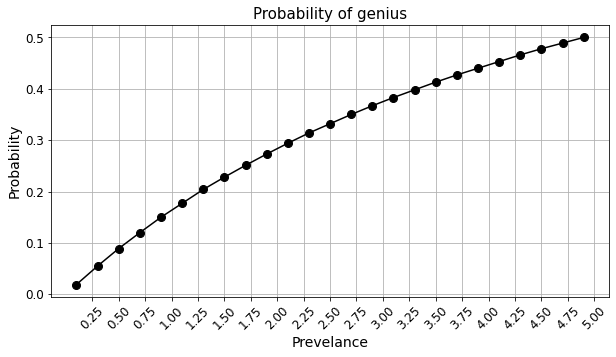

In [9]:
ps = []
pres = []
for pre in [i*0.001 for i in range(1,51,2)]:
    pres.append(pre*100)
    p = genius_man(prob_th=0.5,
                   sensitivity=0.97,
                   specificity=0.95,
                   prevelance=pre,
                   verbose=False)
    ps.append(p)

plt.figure(figsize=(10,5))
plt.title("Probability of genius",fontsize=15)
plt.plot(pres,ps,color='k',marker='o',markersize=8)
plt.grid(True)
plt.xlabel("Prevelance",fontsize=14)
plt.ylabel("Probability",fontsize=14)
plt.xticks([i*0.25 for i in range(1,21)],fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.show()

In [10]:
# Обратите внимание, что в данном случае наше решение зависит от порога вероятности. 
# В данном примере он установлен на уровне 0,5. 
# При необходимости его можно понизить. 
# При пороге 0,5 у нас должен быть уровень распространенности почти 4,8%, чтобы найти гения с одним положительным результатом теста.

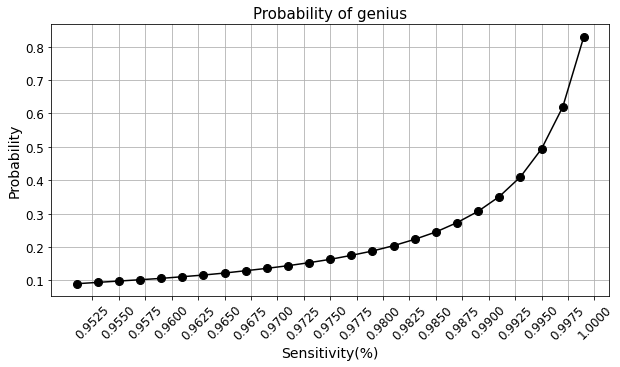

In [11]:
ps = []
sp_ = []
for sp in [i*0.001+0.95 for i in range(1,50,2)]:
    sp_.append(sp)
    p = genius_man(prob_th=0.5,sensitivity=0.97,specificity=sp,prevelance=0.005,verbose=False)
    ps.append(p)

plt.figure(figsize=(10,5))
plt.title("Probability of genius",fontsize=15)
plt.plot(sp_,ps,color='k',marker='o',markersize=8)
plt.grid(True)
plt.xlabel("Sensitivity(%)",fontsize=14)
plt.ylabel("Probability",fontsize=14)
plt.xticks([0.95+i*0.0025 for i in range(1,21)],fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.show()

In [12]:
# Имеет место нелинейная зависимость вероятности от специфичности теста, и по мере того, 
# как тест достигает совершенства (с точки зрения специфичности), мы получаем значительное увеличение вероятности. 
# Следовательно, все усилия отдела разработки должны быть направлены на улучшение специфичности теста.

### Лучшее в байесовском выводе - это возможность использовать предшествующие знания в форме априорного вероятностного члена в числителе теоремы Байеса.

In [13]:
# Предварительные знания - это не что иное, как вычисленная вероятность теста, которая затем возвращается к следующему тесту .
# Это означает, что для этих случаев, когда уровень распространенности среди населения в целом чрезвычайно низок, 
# один из способов повысить уверенность в результате теста - назначить последующий тест, если первый результат теста окажется положительным.

In [14]:
p1 = genius_man(
  prob_th=0.5,
  sensitivity=0.97,
  specificity=0.95,
  prevelance=0.005)
print("Genius",
      round(p1,3))
print("---------")
p2 = genius_man(
  prob_th=0.5,
  sensitivity=0.97,
  specificity=0.95,
  prevelance=p1)
print("Genius",
      round(p2,3))
print("---------")
p3 = genius_man(
  prob_th=0.5, 
  sensitivity=0.97,
  specificity=0.95,
  prevelance=p2)
print("Genius",
      round(p3,3))

Nogenius
Genius 0.089
---------
Genius
Genius 0.655
---------
Genius
Genius 0.974


In [15]:
# Когда мы выполняем тест в первый раз, расчетная (апостериорная) вероятность низка, всего 8,9%, 
# но она значительно возрастает до 65,4% во втором тесте, а третий положительный тест дает апостериорную вероятность 97,3%.
# Следовательно, неточный тест можно использовать несколько раз, чтобы обновить наше мнение с помощью последовательного применения правила Байеса.
# Лучшее в байесовском выводе - это возможность использовать предшествующие знания в форме априорного вероятностного члена в числителе теоремы Байеса.